# Auswertung der Suchqualität für Programmiersprachen

Dieses Notebook definiert für verschiedene Beispielabfragen die erwarteten Treffer (Programmiersprachen), führt die Abfragen gegen verschiedene Solr-Cores aus, sammelt die Ergebnisse und visualisiert die Suchqualität (Precision, Recall, F1-Score) sowie deren Verbesserungen zwischen den Cores.

**Ablauf:**
1. Definition der erwarteten Treffer für jede Abfrage
2. Ausführung der Abfragen gegen verschiedene Solr-Cores und Sammeln der Ergebnisse
3. Speicherung der Auswertungsergebnisse als JSON
4. Visualisierung und Vergleich der Scores und Verbesserungen für jede Abfrage und jeden Core

### This are the expected hits for each querry

In [50]:
expected_langs = [
    {
        "standard_query": "title:Python",
        "expected_langs": [{"lang": "Python", "rank": 1}],
    },
    {
        "standard_query": "title:Python3",
        "expected_langs": [{"lang": "Python", "rank": 1}],
    },
    {
        "standard_query": "title:Python3.12",
        "expected_langs": [{"lang": "Python", "rank": 1}],
    },
    {
        "standard_query": "title:Go",
        "expected_langs": [{"lang": "Go", "rank": 1}],
    },
    {
        "standard_query": "title:Golang",
        "expected_langs": [{"lang": "Go", "rank": 1}],
    },
    {
        "standard_query": "document:functional",
        "expected_langs": [
            {"lang": "Haskell",      "rank": 1},
            {"lang": "Elixir",       "rank": 2},
            {"lang": "Scala",        "rank": 3},
            {"lang": "R",            "rank": 4},
            {"lang": "Rust",         "rank": 5},
            {"lang": "Python",       "rank": 6},
            {"lang": "TypeScript",   "rank": 7},
            {"lang": "JavaScript",   "rank": 8},
            {"lang": "Kotlin",       "rank": 9},
            {"lang": "Swift",        "rank": 10},
            {"lang": "Lua",          "rank": 11},
            {"lang": "Ruby",         "rank": 12},
            {"lang": "Apache Groovy","rank": 13},
        ]
    },
    {
        "standard_query": "document:\"functional\" AND NOT document:\"object-oriented\"",
        "expected_langs": [
            {"lang": "Haskell",      "rank": 1},
            {"lang": "Elixir",       "rank": 2},
            {"lang": "Scala",        "rank": 3},
            {"lang": "R",            "rank": 4},
            {"lang": "Rust",         "rank": 5},
            {"lang": "Python",       "rank": 6},
            {"lang": "TypeScript",   "rank": 7},
            {"lang": "JavaScript",   "rank": 8},
            {"lang": "Kotlin",       "rank": 9},
            {"lang": "Swift",        "rank": 10},
            {"lang": "Lua",          "rank": 11},
            {"lang": "Ruby",         "rank": 12},
            {"lang": "Apache Groovy","rank": 13},
        ]
    },
    {
        "standard_query": "document:declarative",
        "expected_langs": [
            {"lang": "Haskell",      "rank": 1},
            {"lang": "Elixir",       "rank": 2},
            {"lang": "Scala",        "rank": 3},
            {"lang": "R",            "rank": 4},
            {"lang": "Rust",         "rank": 5},
            {"lang": "Python",       "rank": 6},
            {"lang": "TypeScript",   "rank": 7},
            {"lang": "JavaScript",   "rank": 8},
            {"lang": "Kotlin",       "rank": 9},
            {"lang": "Swift",        "rank": 10},
            {"lang": "Lua",          "rank": 11},
            {"lang": "Ruby",         "rank": 12},
            {"lang": "Apache Groovy","rank": 13},
        ]
    },
    {
        "standard_query": "document:object-oriented",
        "expected_langs": [
            {"lang": "Java",         "rank": 1},
            {"lang": "C Sharp",      "rank": 2},
            {"lang": "C++",          "rank": 3},
            {"lang": "Kotlin",       "rank": 4},
            {"lang": "Swift",        "rank": 5},
            {"lang": "Apache Groovy","rank": 6},
            {"lang": "Python",       "rank": 7},
            {"lang": "Ruby",         "rank": 8},
            {"lang": "TypeScript",   "rank": 9},
            {"lang": "JavaScript",   "rank": 10},
            {"lang": "PowerShell",   "rank": 11},
            {"lang": "Go",           "rank": 12},
            {"lang": "Rust",         "rank": 13},
            {"lang": "Dart",         "rank": 14},
            {"lang": "Scala",        "rank": 15},
            {"lang": "Mathlab",      "rank": 16},
            {"lang": "Lua",          "rank": 17}
        ]
    },
    {
        "standard_query": "document:\"object-oriented\" AND NOT document:\"functional\"",
        "expected_langs": [
            {"lang": "Java",         "rank": 1},
            {"lang": "C Sharp",      "rank": 2},
            {"lang": "C++",          "rank": 3},
            {"lang": "Kotlin",       "rank": 4},
            {"lang": "Swift",        "rank": 5},
            {"lang": "Apache Groovy","rank": 6},
            {"lang": "Python",       "rank": 7},
            {"lang": "Ruby",         "rank": 8},
            {"lang": "TypeScript",   "rank": 9},
            {"lang": "JavaScript",   "rank": 10},
            {"lang": "PowerShell",   "rank": 11},
            {"lang": "Go",           "rank": 12},
            {"lang": "Rust",         "rank": 13},
            {"lang": "Dart",         "rank": 14},
            {"lang": "Scala",        "rank": 15},
            {"lang": "Mathlab",      "rank": 16},
            {"lang": "Lua",          "rank": 17}
        ]
    },
    {
        "standard_query": "document:imperative",
        "expected_langs": [
            {"lang": "Java",         "rank": 1},
            {"lang": "C Sharp",      "rank": 2},
            {"lang": "C++",          "rank": 3},
            {"lang": "Kotlin",       "rank": 4},
            {"lang": "Swift",        "rank": 5},
            {"lang": "Apache Groovy","rank": 6},
            {"lang": "Python",       "rank": 7},
            {"lang": "Ruby",         "rank": 8},
            {"lang": "TypeScript",   "rank": 9},
            {"lang": "JavaScript",   "rank": 10},
            {"lang": "PowerShell",   "rank": 11},
            {"lang": "Go",           "rank": 12},
            {"lang": "Rust",         "rank": 13},
            {"lang": "Dart",         "rank": 14},
            {"lang": "Scala",        "rank": 15},
            {"lang": "Mathlab",      "rank": 16},
            {"lang": "Lua",          "rank": 17}
        ]
    },
    {
        "standard_query": "title:C#",
        "expected_langs": [{"lang": "C Sharp", "rank": 1}],
    },
    {
        "standard_query": "title:\"C Sharp\"",
        "expected_langs": [{"lang": "C Sharp", "rank": 1}],
    },
    {
        "standard_query": "title:C++",
        "expected_langs": [
            {"lang": "C++", "rank": 1},
            {"lang": "C",   "rank": 2}
        ],
    },
    {
        "standard_query": "title:\"C plus plus\"",
        "expected_langs": [
            {"lang": "C++", "rank": 1},
            {"lang": "C",   "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"JavaScript framework\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"Javascrit framework\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"most modern programming languages\"",
        "expected_langs": [
            {"lang": "Rust",       "rank": 1},
            {"lang": "Go",         "rank": 2},
            {"lang": "Swift",      "rank": 3},
            {"lang": "Kotlin",     "rank": 4},
            {"lang": "TypeScript", "rank": 5},
            {"lang": "Dart",       "rank": 6},
            {"lang": "Zig",        "rank": 7},
            {"lang": "Elixir",     "rank": 8}
        ]
    },
    {
        "standard_query": "document:\"modern programming languages\"",
        "expected_langs": [
            {"lang": "Rust",       "rank": 1},
            {"lang": "Go",         "rank": 2},
            {"lang": "Swift",      "rank": 3},
            {"lang": "Kotlin",     "rank": 4},
            {"lang": "TypeScript", "rank": 5},
            {"lang": "Dart",       "rank": 6},
            {"lang": "Zig",        "rank": 7},
            {"lang": "Elixir",     "rank": 8}
        ]
    },
    {
        "standard_query": "document:\"trendy programming languages\"",
        "expected_langs": [
            {"lang": "Rust",       "rank": 1},
            {"lang": "Go",         "rank": 2},
            {"lang": "Swift",      "rank": 3},
            {"lang": "Kotlin",     "rank": 4},
            {"lang": "TypeScript", "rank": 5},
            {"lang": "Dart",       "rank": 6},
            {"lang": "Zig",        "rank": 7},
            {"lang": "Elixir",     "rank": 8}
        ]
    },
    {
        "standard_query": "document:\"What is the best programming language for web development\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"Top programming languages for web development\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"Best coding languages for building websites\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"Best programming language for web development\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"Best systems programming language for safety\"",
        "expected_langs": [
            {"lang": "Rust",   "rank": 1},
            {"lang": "Swift",  "rank": 2},
            {"lang": "Zig",    "rank": 3},
            {"lang": "Go",     "rank": 4}
        ]
    },
    {
        "standard_query": "document:\"What is a memory-safe programming language\"",
        "expected_langs": [
            {"lang": "Rust",   "rank": 1},
            {"lang": "Swift",  "rank": 2},
            {"lang": "Zig",    "rank": 3}
        ]
    },
    {
        "standard_query": "document:\"Most secure programming language\"",
        "expected_langs": [
            {"lang": "Rust", "rank": 1}
        ]
    },
    # Additional querries Metadata evaluation
    {
        "standard_query": "document:\"memory-safe\"",
        "expected_langs": [
            {"lang": "Rust",   "rank": 1},
            {"lang": "Swift",  "rank": 2},
            {"lang": "Zig",    "rank": 3}
        ]
    },
    {
        "standard_query": "document:\"memory-safe\" AND memory_management:*",
        "expected_langs": [
            {"lang": "Rust",   "rank": 1},
            {"lang": "Swift",  "rank": 2},
            {"lang": "Zig",    "rank": 3}
        ]
    }
]


In [51]:
from core import evaluate_case, EvaluationResult

# Beispiel: core und Konfiguration
cores = ["ProgLang24", "ProgLang24_2"] # "ProgLang24_6"

results = []
for core in cores:
    solr_url = f'http://10.248.16.116:8983/solr/{core}/select'
    for case in expected_langs:
        result: EvaluationResult = evaluate_case(case, solr_url, core, facets=None)
        results.append(result)


DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'title:Python'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'title:Python3'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'title:Python3.12'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'title:Go'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'title:Golang'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:functional'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:"functional" AND NOT document:"object-oriented"'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:declarative'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:object-oriented'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:"object-oriented" AND NOT document:"functi

In [52]:
import json

with open("./results/results-f1.json", "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=2)

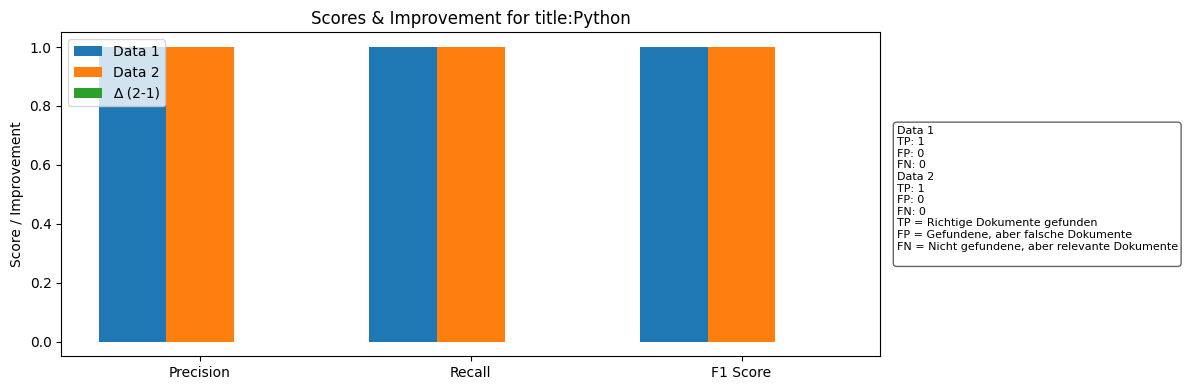

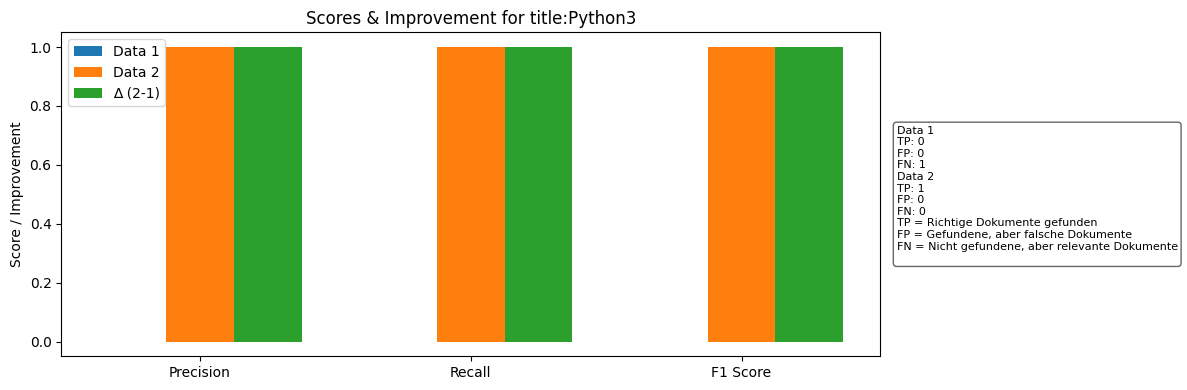

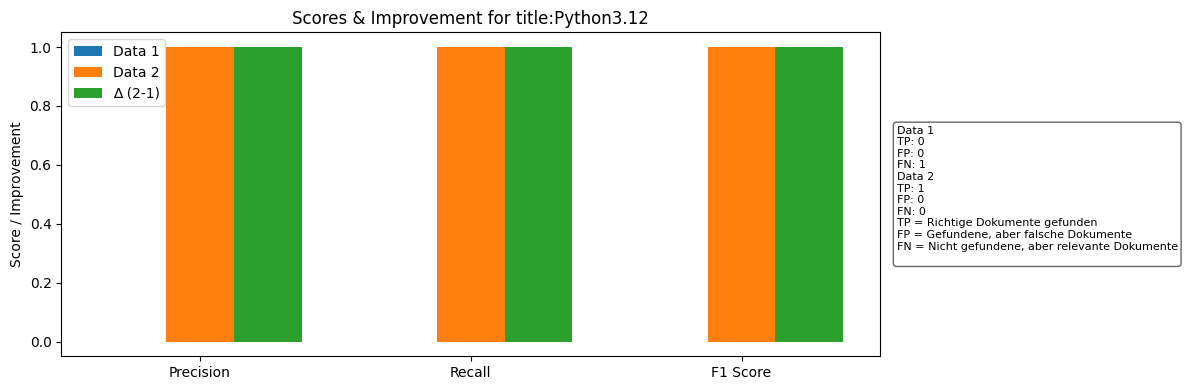

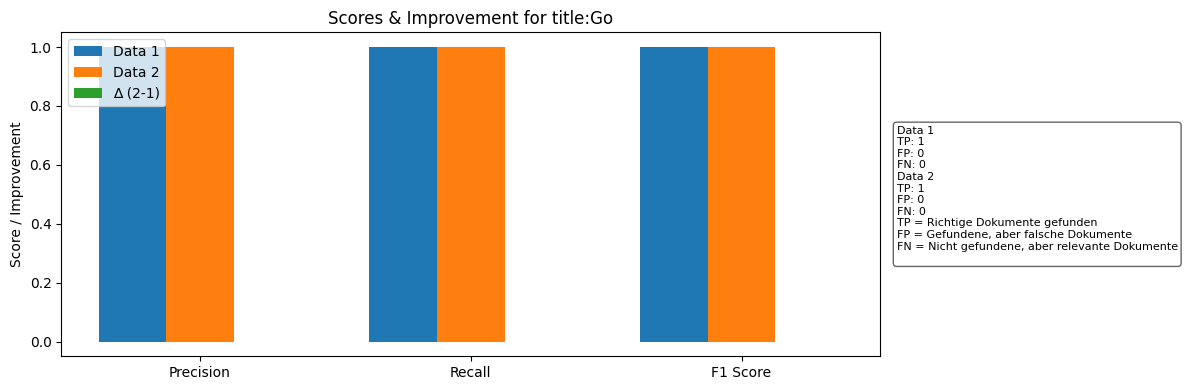

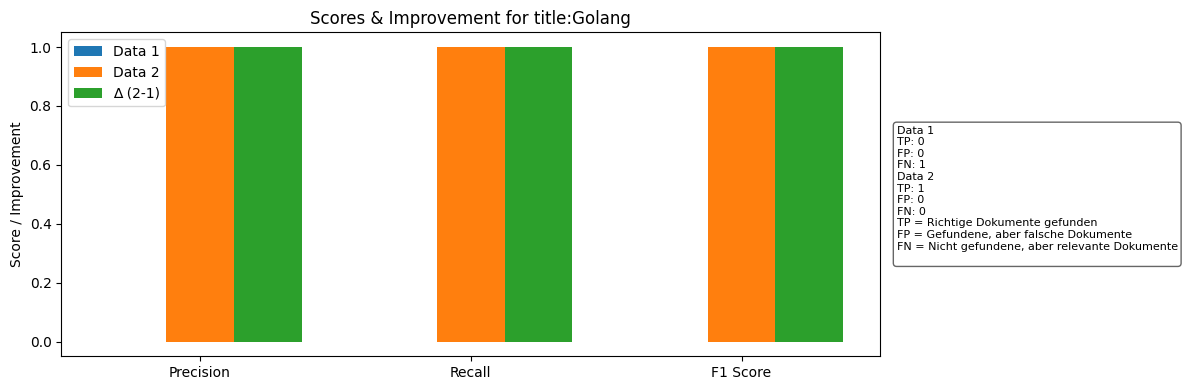

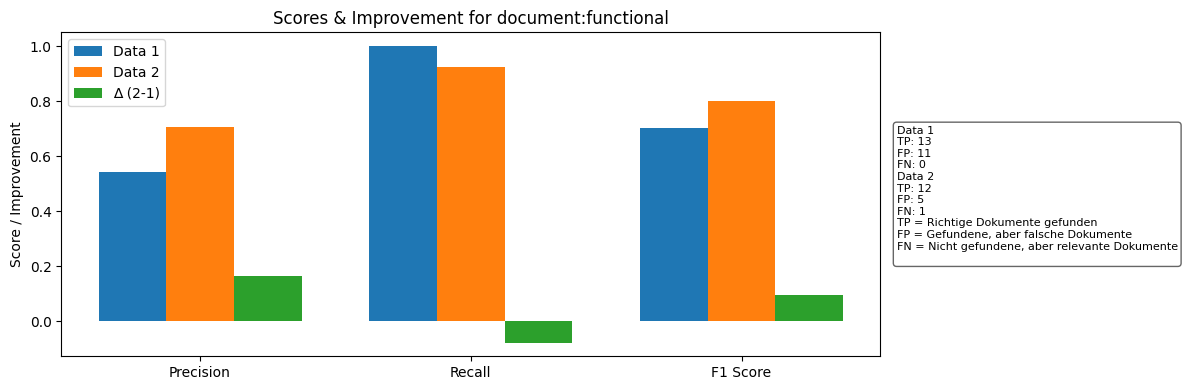

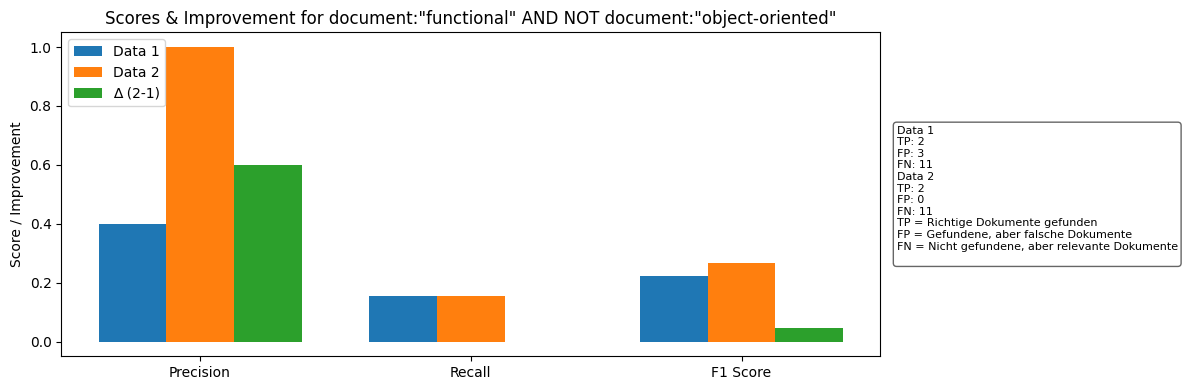

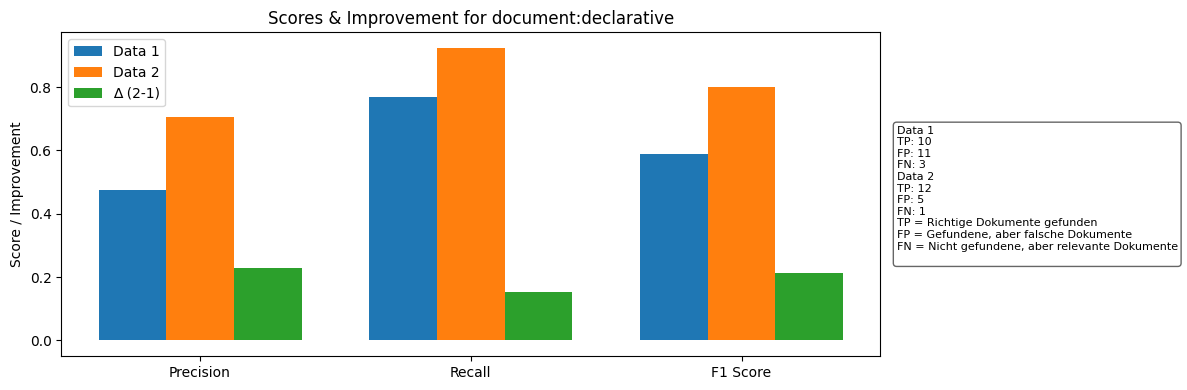

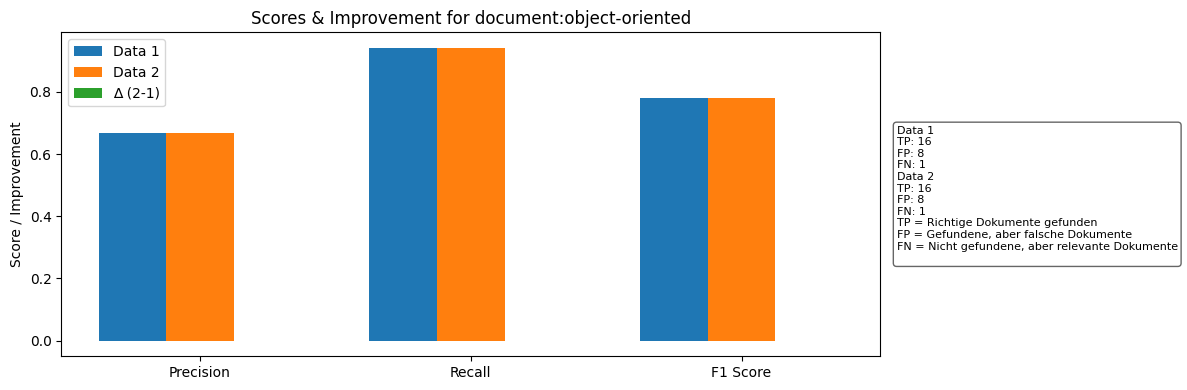

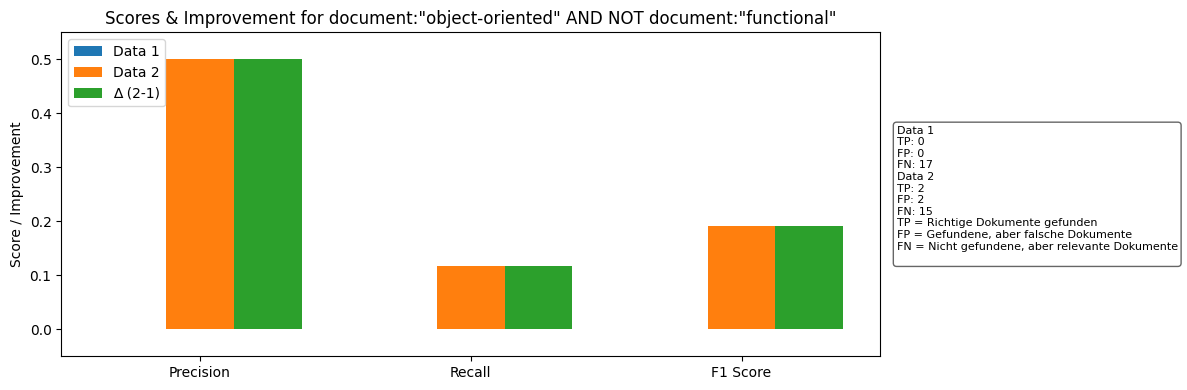

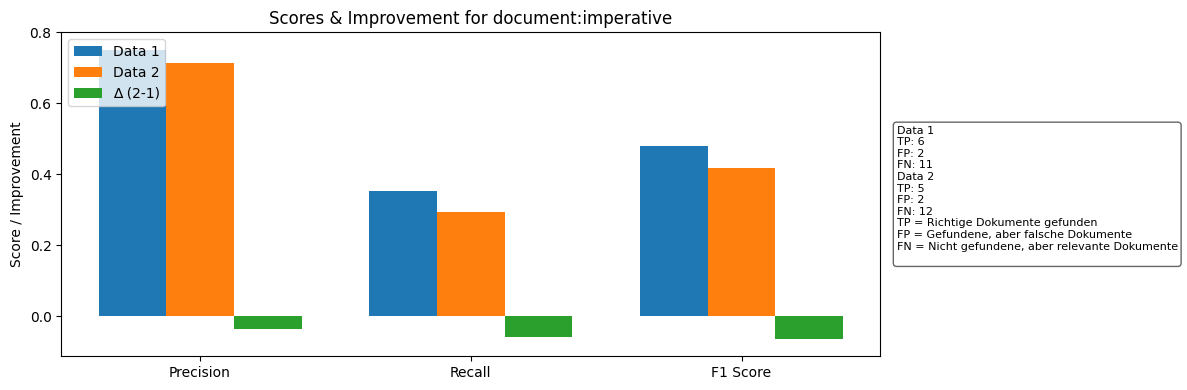

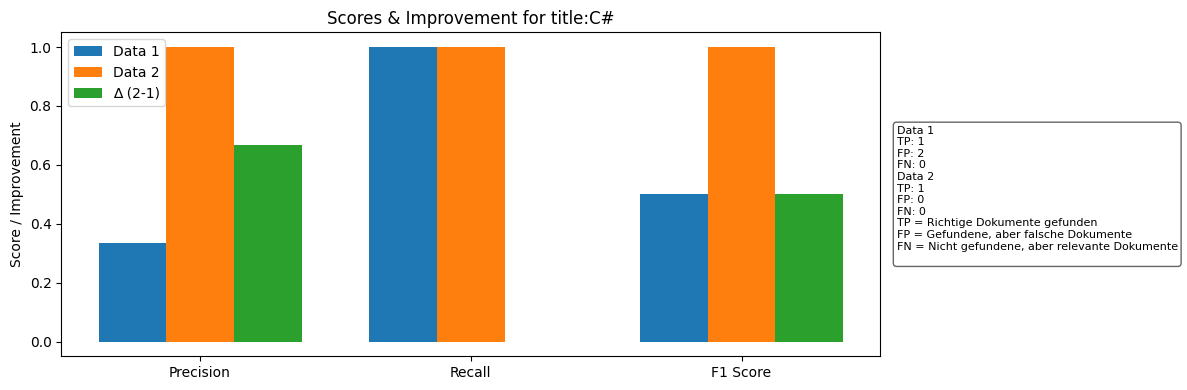

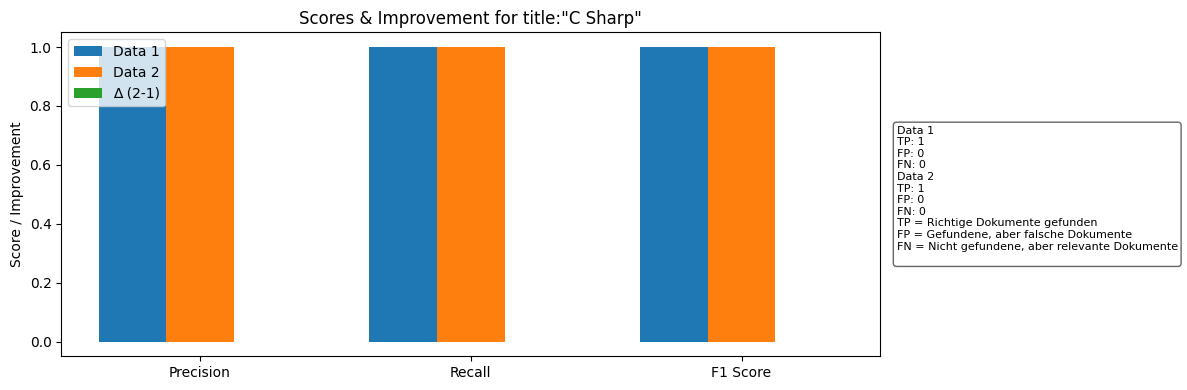

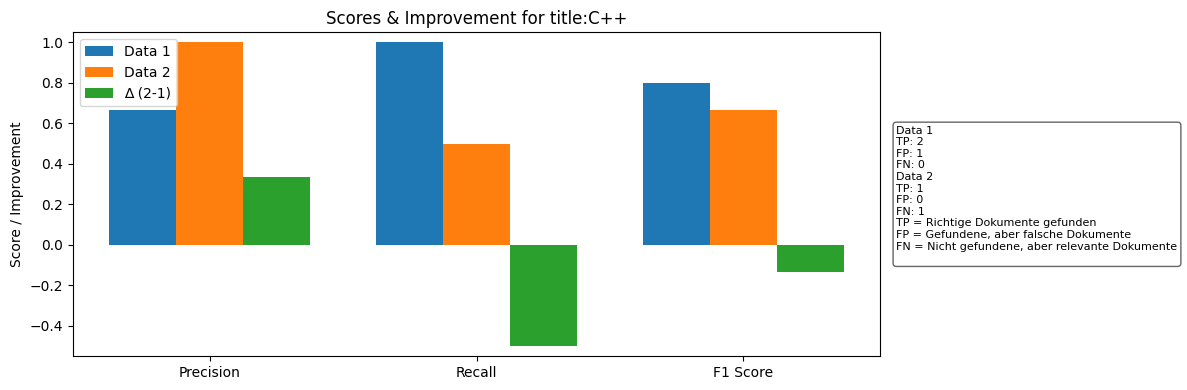

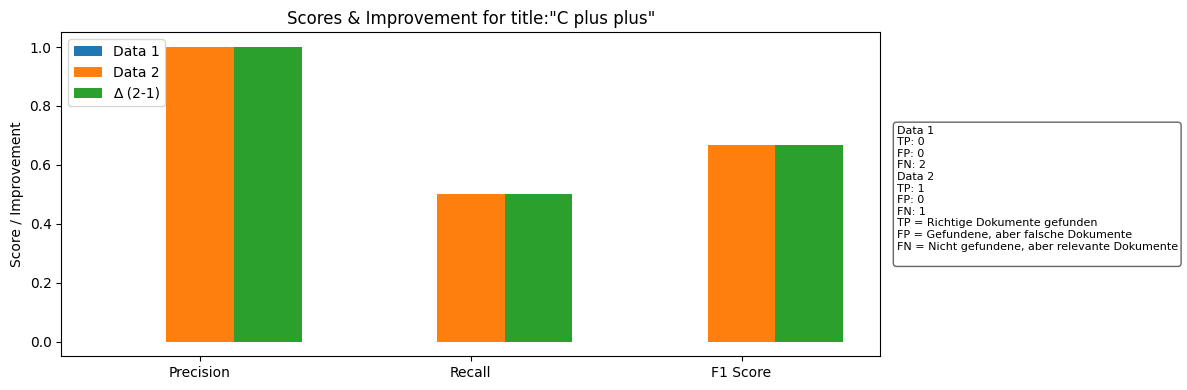

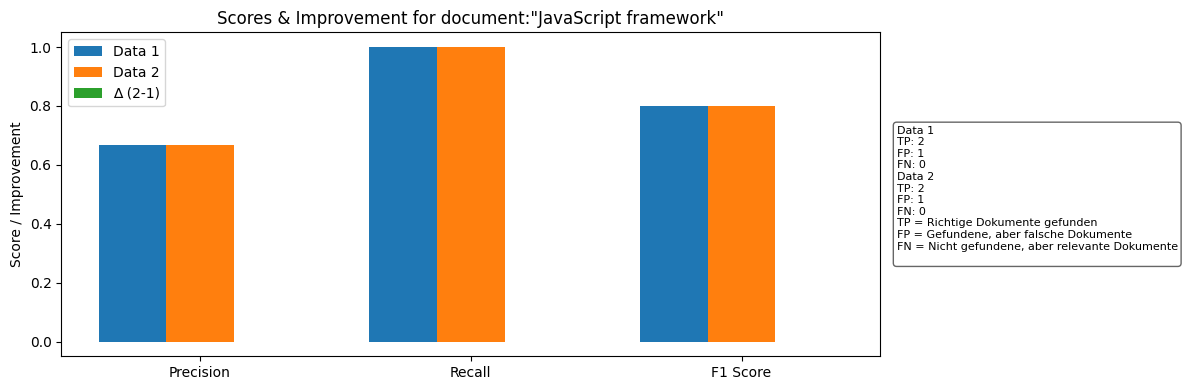

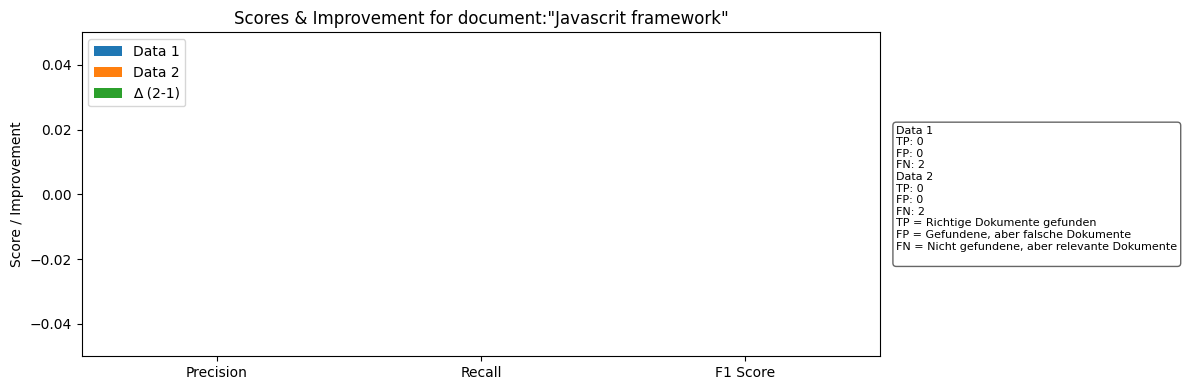

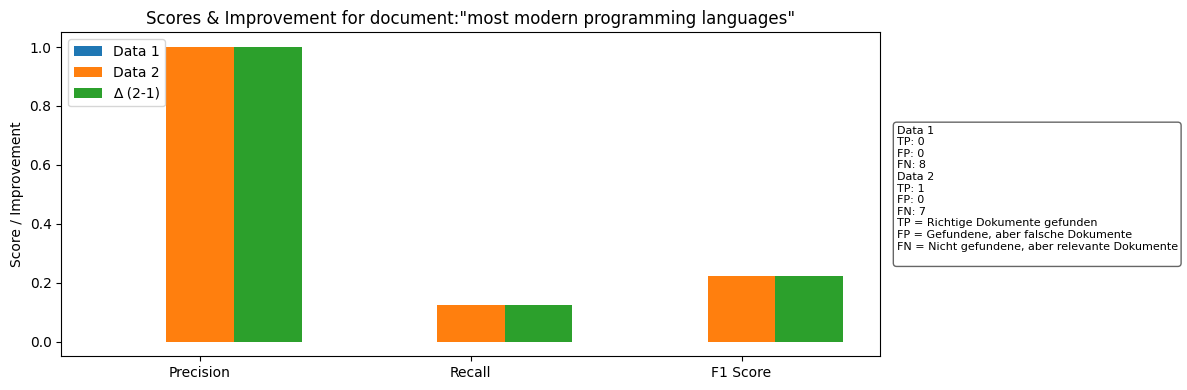

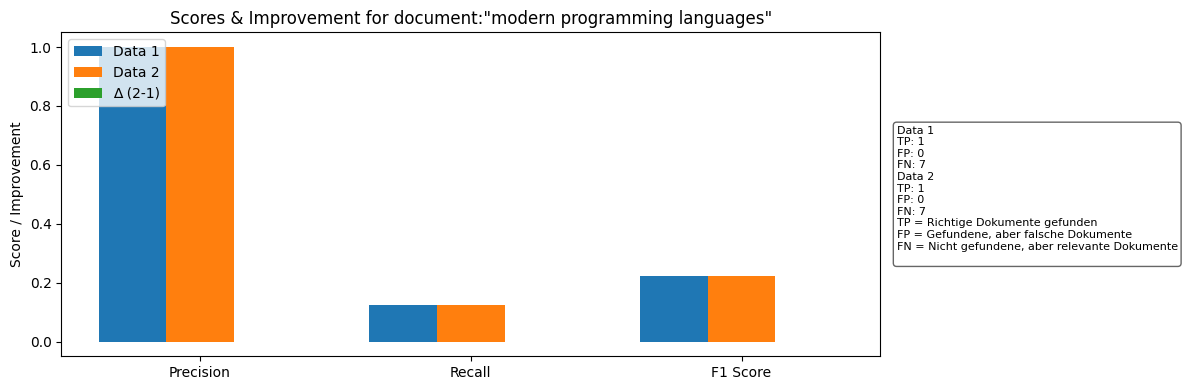

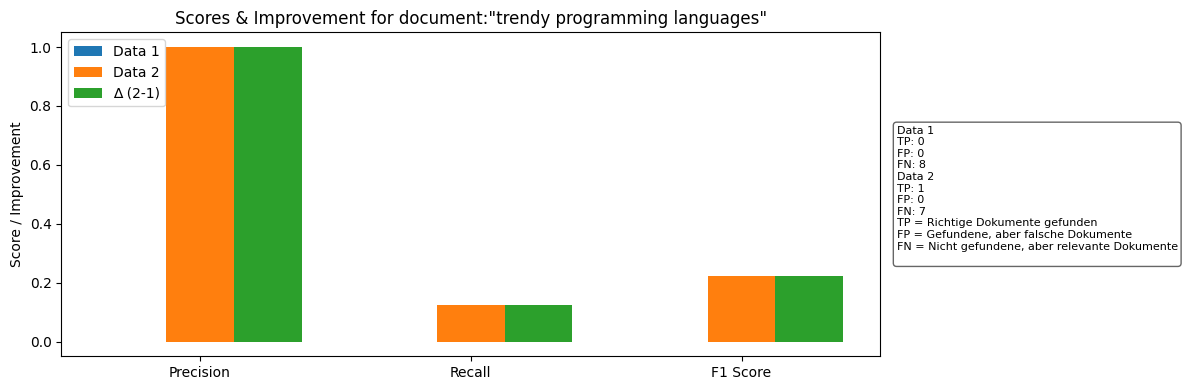

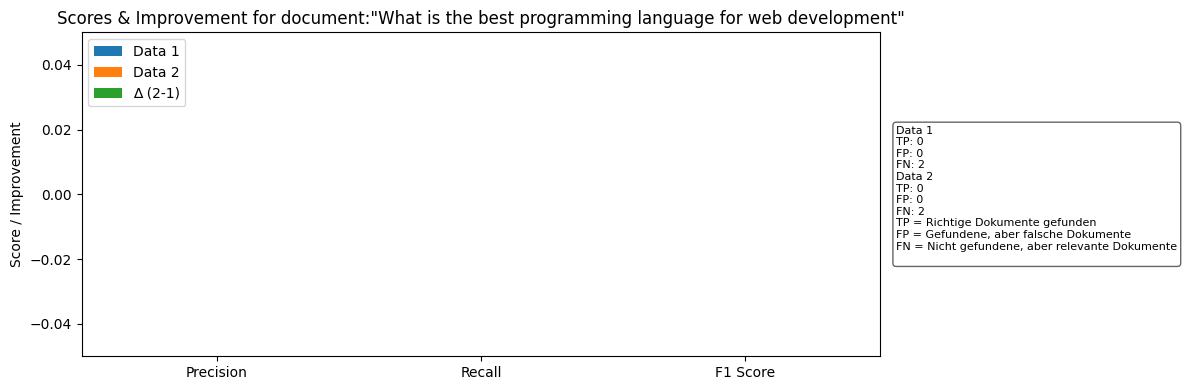

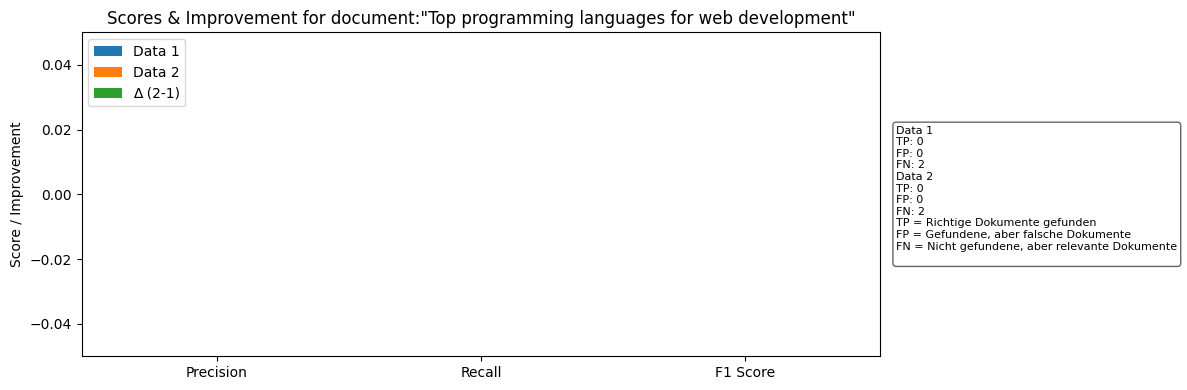

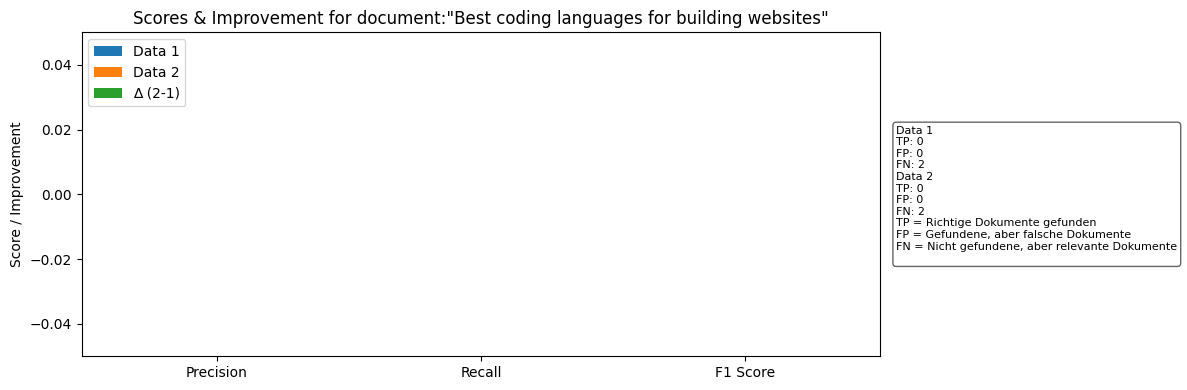

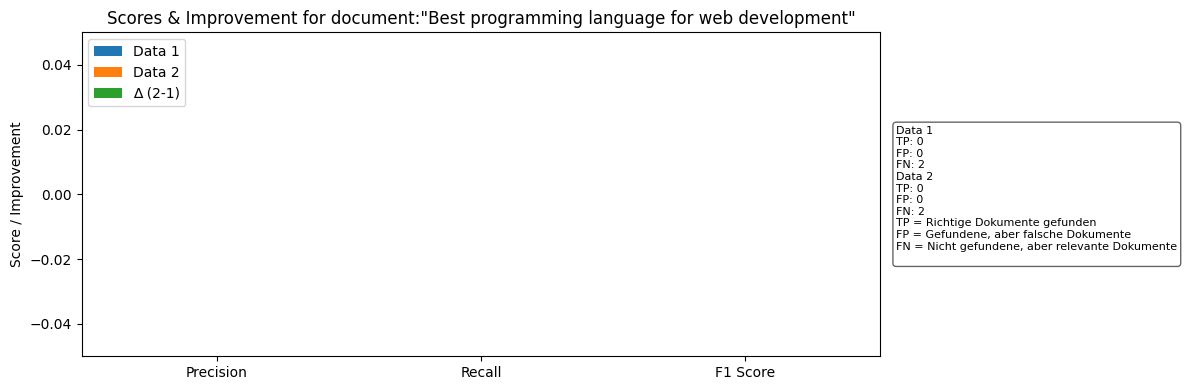

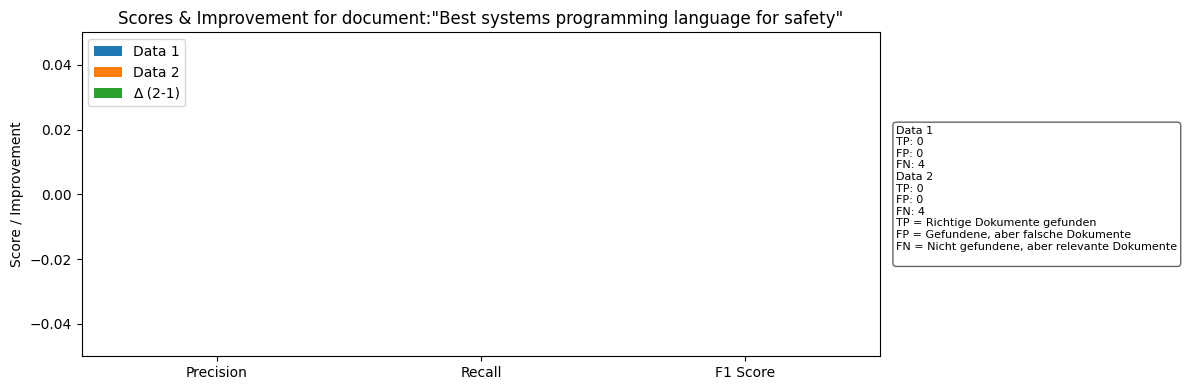

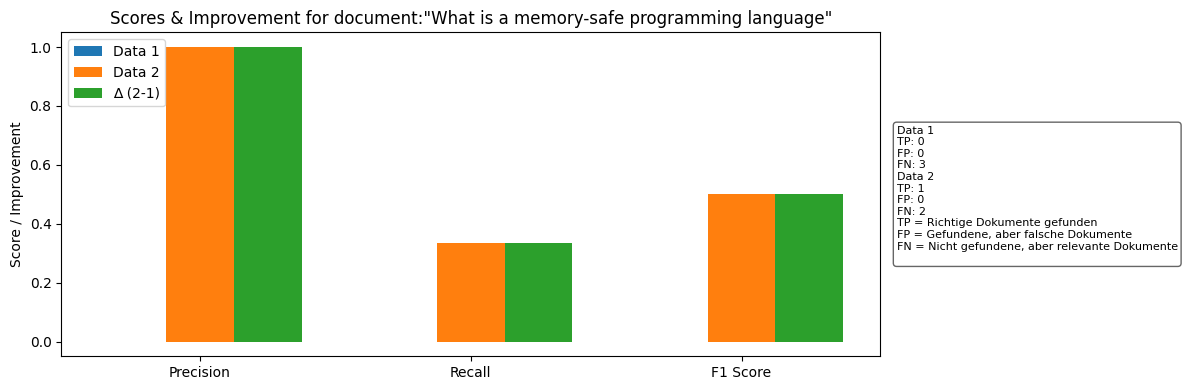

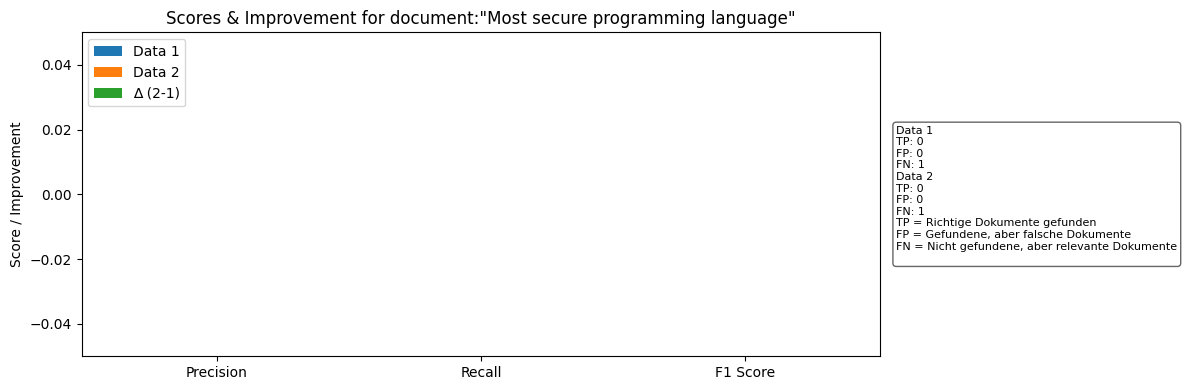

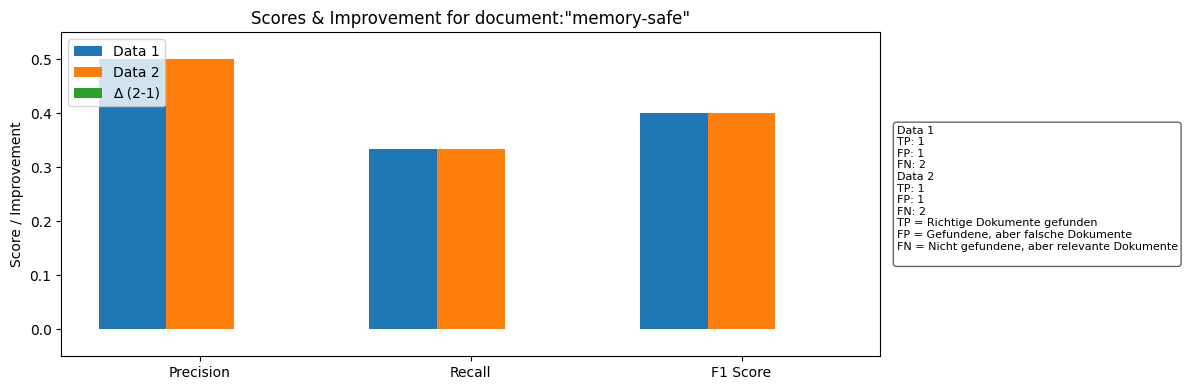

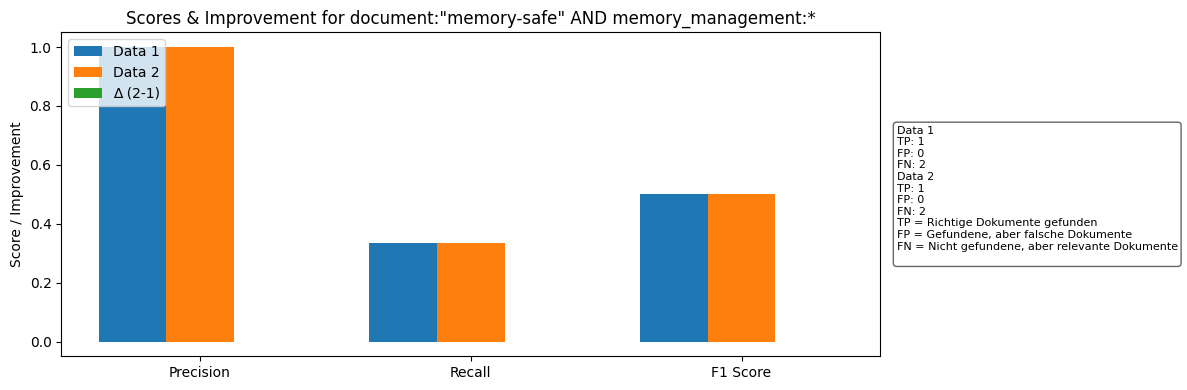

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# --- Adapter: Gruppiere results nach core ---
from collections import defaultdict

grouped = defaultdict(list)
for r in results:
    grouped[r["core"]].append(r)

# Gehe davon aus, dass genau zwei Cores da sind:
core_names = list(grouped.keys())
if len(core_names) != 2:
    raise ValueError("Erwarte genau 2 Cores, gefunden: " + ", ".join(core_names))

core1, core2 = core_names[0], core_names[1]
data1 = grouped[core1]
data2 = grouped[core2]

# Convert lists to dicts keyed by name
d1 = {d["name"]: d for d in data1}
d2 = {d["name"]: d for d in data2}

# Metrics and their labels
metrics = ["s1_pre", "s1_rec", "s1_f1"]
labels = ["Precision", "Recall", "F1 Score"]

# Plot improvement for each name
for name in d1:
    # raw scores + diff
    v1 = [d1[name][m] for m in metrics]
    v2 = [d2[name][m] for m in metrics]
    diff = [b - a for a, b in zip(v1, v2)]

    # build the plot
    x = np.arange(len(metrics))
    width = 0.25
    fig, ax = plt.subplots(figsize=(12, 4))

    ax.bar(x - width,   v1,   width, label="Data 1")
    ax.bar(x,           v2,   width, label="Data 2")
    ax.bar(x + width,   diff, width, label="∆ (2-1)")

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(
        min(min(diff), 0) - 0.05,
        max(v1 + v2 + diff) + 0.05
    )
    ax.set_ylabel("Score / Improvement")
    ax.set_title(f"Scores & Improvement for {name}")
    ax.legend(loc="upper left")

    # pull out TP/FP/FN from dataset 1 (or 2) and make the little comment box
    tp1, fp1, fn1 = d1[name]["tp"], d1[name]["fp"], d1[name]["fn"]
    tp2, fp2, fn2 = d2[name]["tp"], d2[name]["fp"], d2[name]["fn"]
    comment = (
        "Data 1\n"
        f"TP: {tp1}\n"
        f"FP: {fp1}\n"
        f"FN: {fn1}\n"
        "Data 2\n"
        f"TP: {tp2}\n"
        f"FP: {fp2}\n"
        f"FN: {fn2}\n"
        "TP = Richtige Dokumente gefunden\n"
        "FP = Gefundene, aber falsche Dokumente\n"
        "FN = Nicht gefundene, aber relevante Dokumente\n"
    )
    # place text to the right of the axes
    ax.text(1.02, 0.5, comment,
            transform=ax.transAxes,
            va="center", ha="left", fontsize=8,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="#666"))

    plt.tight_layout()
    plt.show()

In [ ]:
from core import precision, recall, f1_score

import pysolr
import torch
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer
from IPython.display import display, HTML
import json

# Check device and CUDA availability
print("PyTorch built with CUDA:", torch.version.cuda is not None)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("  GPU count:   ", torch.cuda.device_count())
    print("  Current dev: ", torch.cuda.current_device())
    print("  Device name: ", torch.cuda.get_device_name(0))
    print("  cuDNN ver:   ", torch.backends.cudnn.version())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# Initialize the embedding model
model_id = "Snowflake/snowflake-arctic-embed-l"

# Print the embedding dimension (vector length)
model = SentenceTransformer(model_id, device=device, trust_remote_code=True)
solr = pysolr.Solr('http://10.248.16.116:8983/solr/ProgLang24_7_emb', always_commit=True)

# Function for hybrid search
def hybrid_search(semantic_query, keyword_query, rows=30):
    query_embedding = list(model.encode(semantic_query, prompt_name="query", normalize_embeddings=True))
    
    solr_response = solr.search(
        fl=['id', 'title', 'document', 'score'],
        df="document",                    
        q="t{!bool should=$lexicalQuery should=$vectorQuery}",
        lexicalQuery=f"{{!type=edismax qf=document}}{keyword_query}",
        vectorQuery="{!knn f=document_vector topK=5}" + str([float(w) for w in query_embedding]),                        
        rows=rows
    )
    
    return solr_response

# Function to evaluate hybrid search results using the core evaluation framework
def evaluate_hybrid_search(semantic_query, keyword_query, expected_langs):
    # Run the hybrid search
    hybrid_results = hybrid_search(semantic_query, keyword_query)
    
    # Extract found language titles from the results
    found_langs = []
    for doc in hybrid_results:
        # Extract language name from title (assuming title format includes the language name)
        lang = doc.get('title').replace("(programming language)", "").strip()
        found_langs.append(lang)
    
    # Create a set of found languages
    found_langs_set = set(found_langs)
    
    # Convert expected_langs to the right format if needed
    if isinstance(expected_langs, list) and all(isinstance(item, dict) and "lang" in item for item in expected_langs):
        # Already in correct format (list of dicts with "lang" keys)
        expected_langs_set = {item["lang"] for item in expected_langs}
    else:
        # Convert from simple list to required format
        expected_langs_set = set(expected_langs)
    
    # Calculate TP, FP, FN
    tp_langs = found_langs_set & expected_langs_set
    fp_langs = found_langs_set - expected_langs_set
    fn_langs = expected_langs_set - found_langs_set
    
    tp, fp, fn = len(tp_langs), len(fp_langs), len(fn_langs)
    
    # Calculate precision, recall, F1
    pre = precision(tp, fp)
    rec = recall(tp, fn)
    f1 = f1_score(pre, rec)
    
    # Return the complete evaluation data
    return {
        "core": "ProgLang24_7_emb",
        "query": f"Hybrid: {semantic_query} + {keyword_query}",
        "tp": tp,
        "fp": fp, 
        "fn": fn,
        "s1_pre": pre,
        "s1_rec": rec,
        "s1_f1": f1,
        "found_langs": list(found_langs),
        "expected_langs": list(expected_langs_set),
        "found_langs_set": found_langs_set,
        "expected_langs_set": expected_langs_set
    }
    
# Note: Do NOT reinitialize `results` here; append to existing results from earlier cells
# Run hybrid search for every defined query and append to existing `results`
for case in expected_langs:
    sem_q = case["standard_query"]
    # Derive a keyword query by stripping Solr field prefixes
    kw_q = sem_q.replace('title:', '').replace('document:', '').strip('"')

    # Perform evaluation and tag with original query
    hy_res = evaluate_hybrid_search(sem_q, kw_q, case["expected_langs"])
    hy_res['query'] = sem_q

    print(f"Hybrid results for '{sem_q}':")
    # print(json.dumps(hy_res, indent=2))
    results.append(hy_res)




PyTorch built with CUDA: True
CUDA available: True
  GPU count:    1
  Current dev:  0
  Device name:  NVIDIA GeForce RTX 4070 SUPER
  cuDNN ver:    90100
Using device: cuda
Hybrid results for 'title:Python':
Hybrid results for 'title:Python3':
Hybrid results for 'title:Python3.12':
Hybrid results for 'title:Go':
Hybrid results for 'title:Golang':
Hybrid results for 'document:functional':
Hybrid results for 'document:"functional" AND NOT document:"object-oriented"':
Hybrid results for 'document:declarative':
Hybrid results for 'document:object-oriented':
Hybrid results for 'document:"object-oriented" AND NOT document:"functional"':
Hybrid results for 'document:imperative':
Hybrid results for 'title:C#':
Hybrid results for 'title:"C Sharp"':
Hybrid results for 'title:C++':
Hybrid results for 'title:"C plus plus"':
Hybrid results for 'document:"JavaScript framework"':
Hybrid results for 'document:"Javascrit framework"':
Hybrid results for 'document:"most modern programming languages"':
H

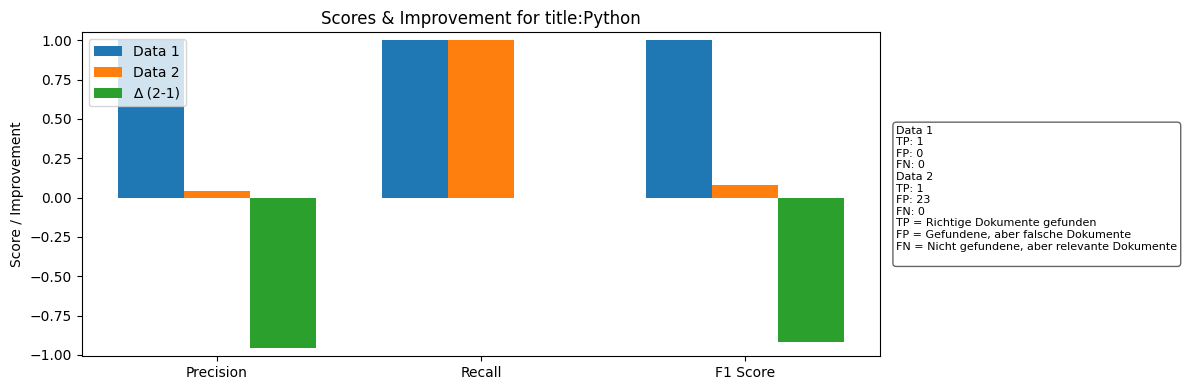

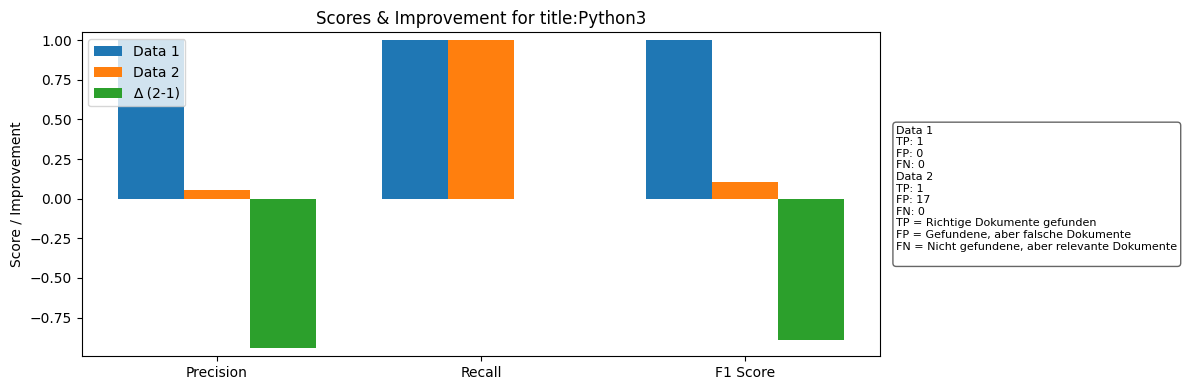

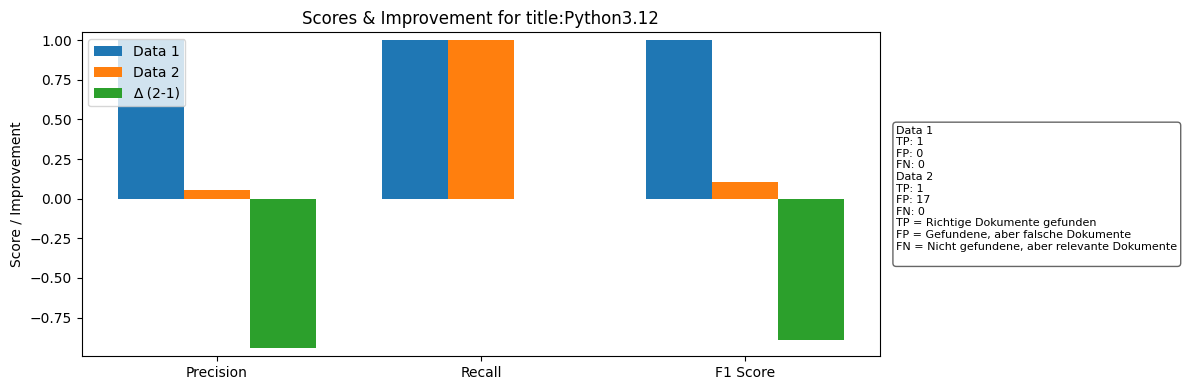

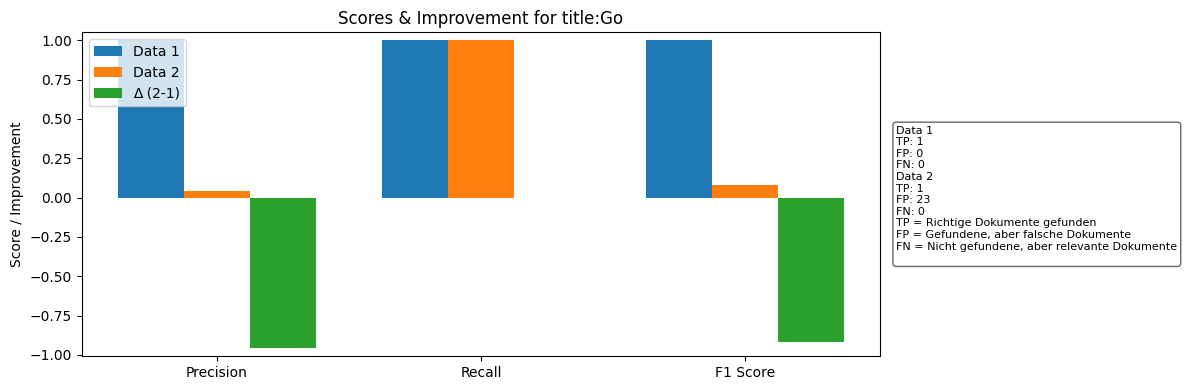

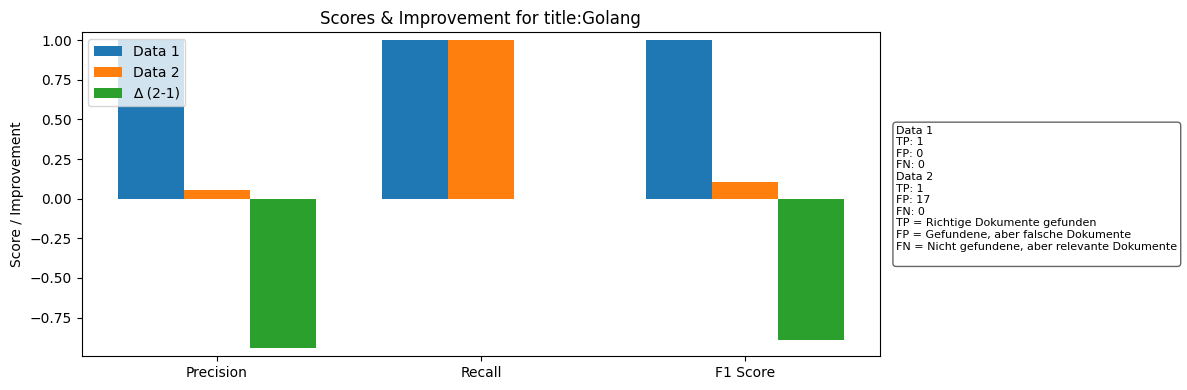

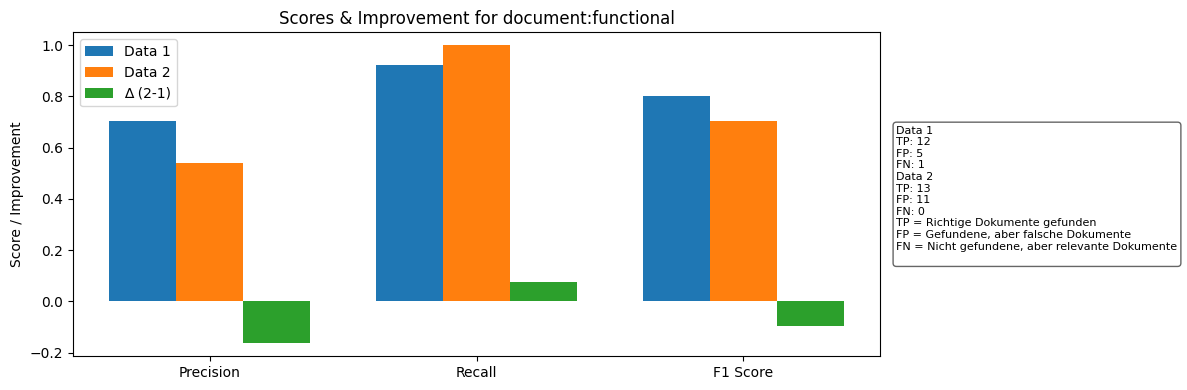

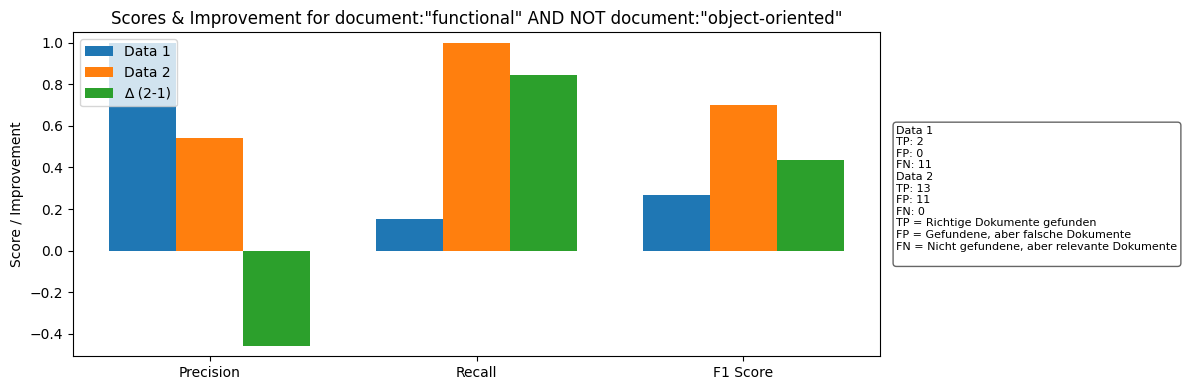

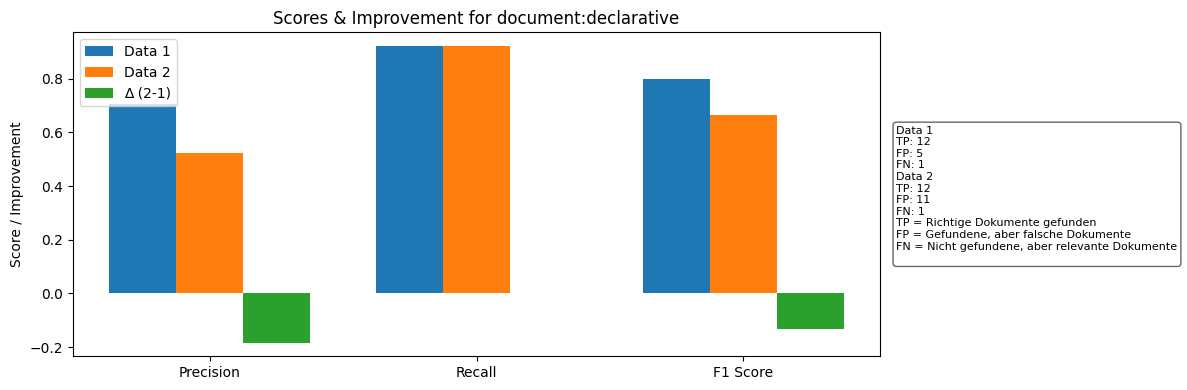

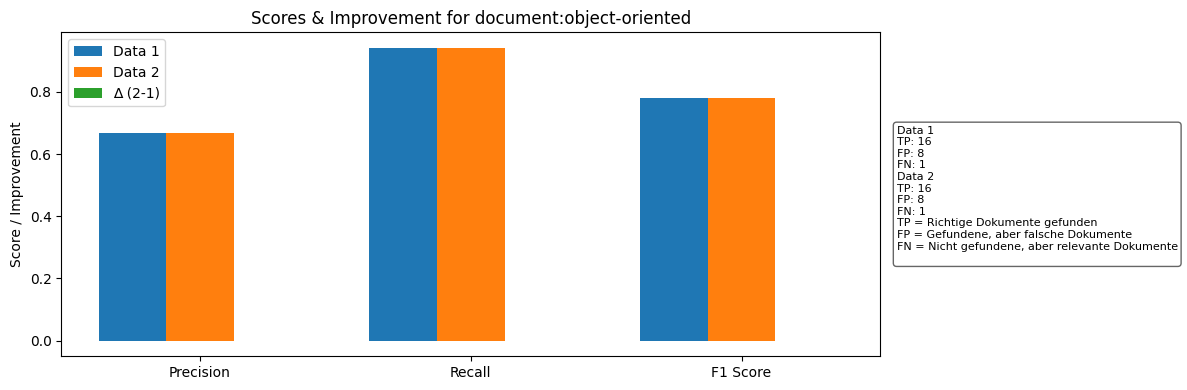

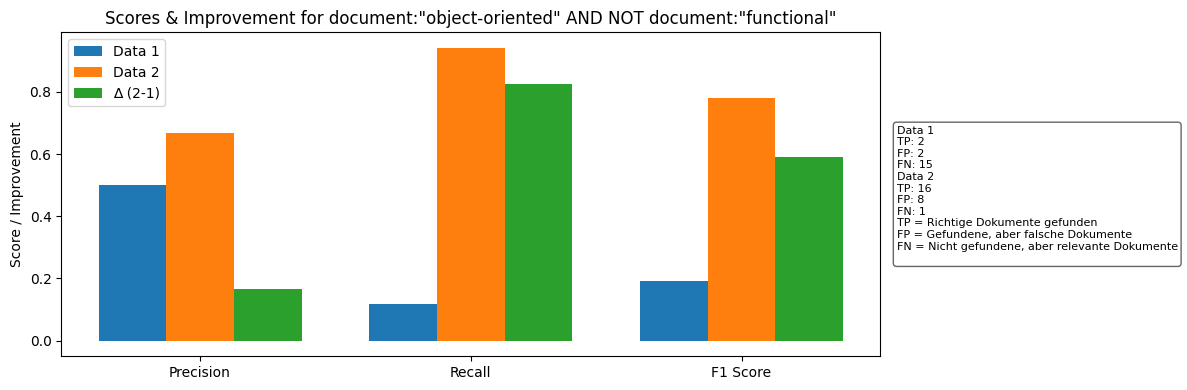

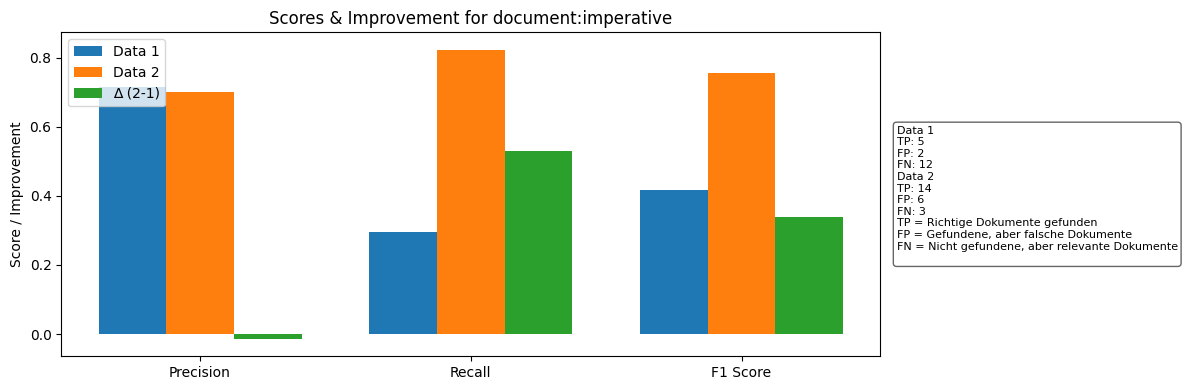

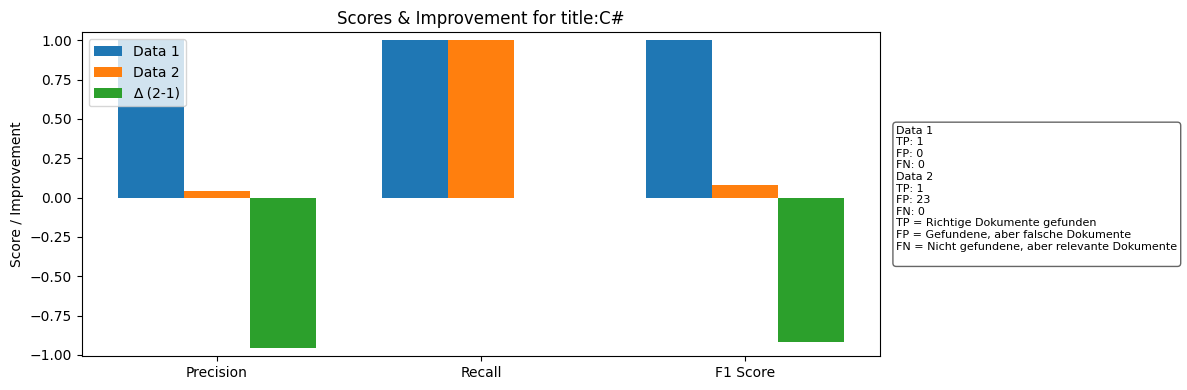

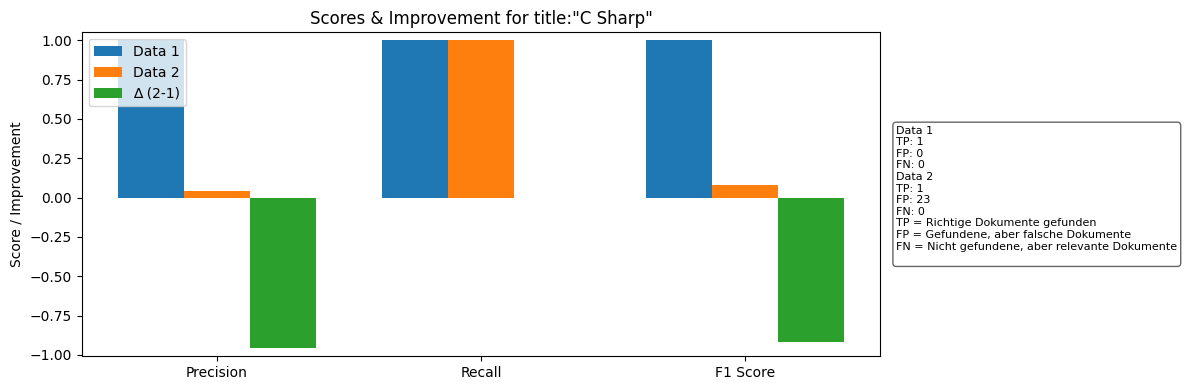

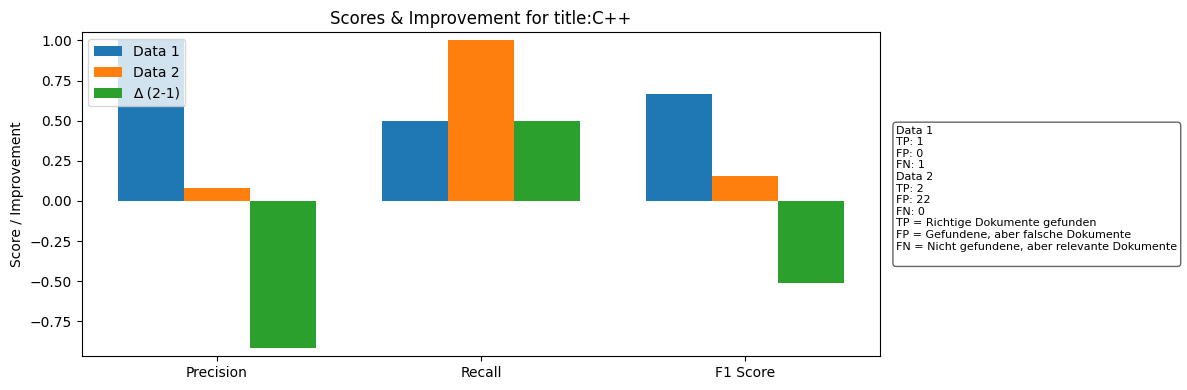

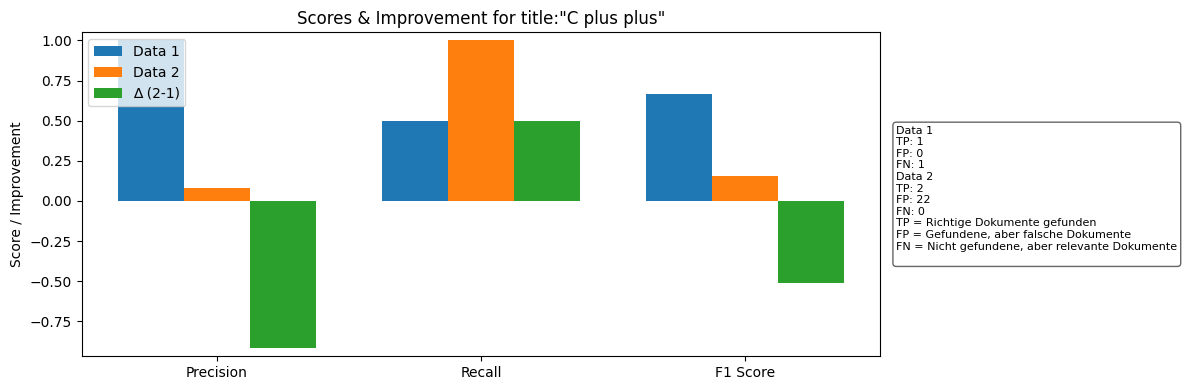

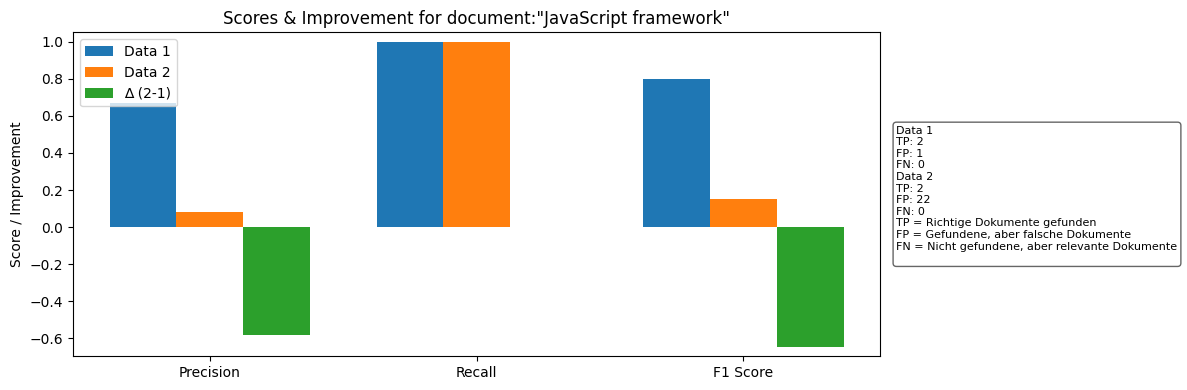

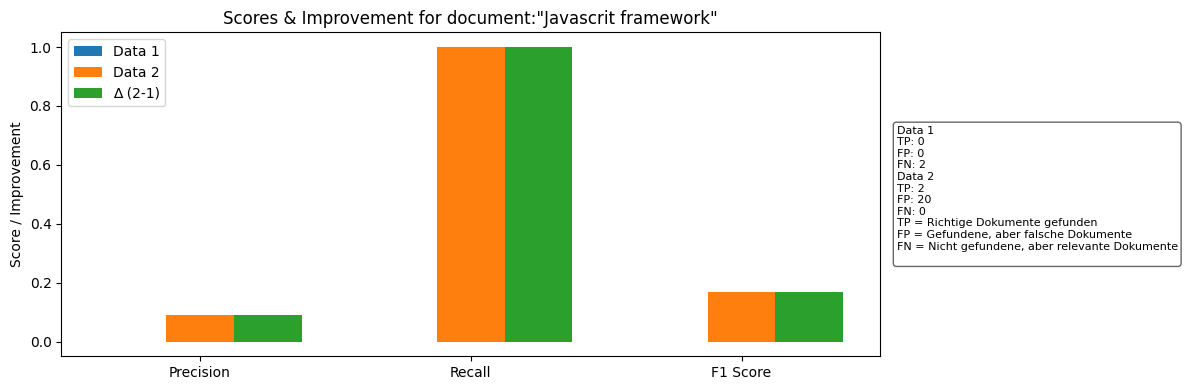

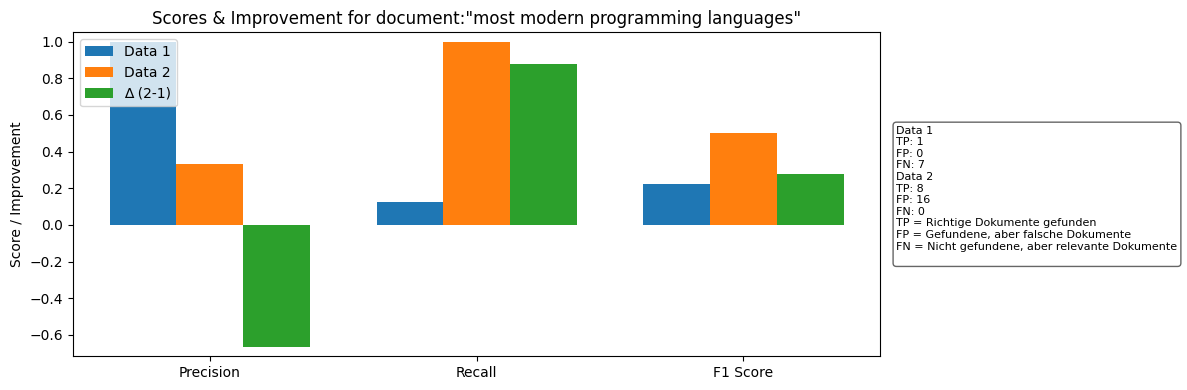

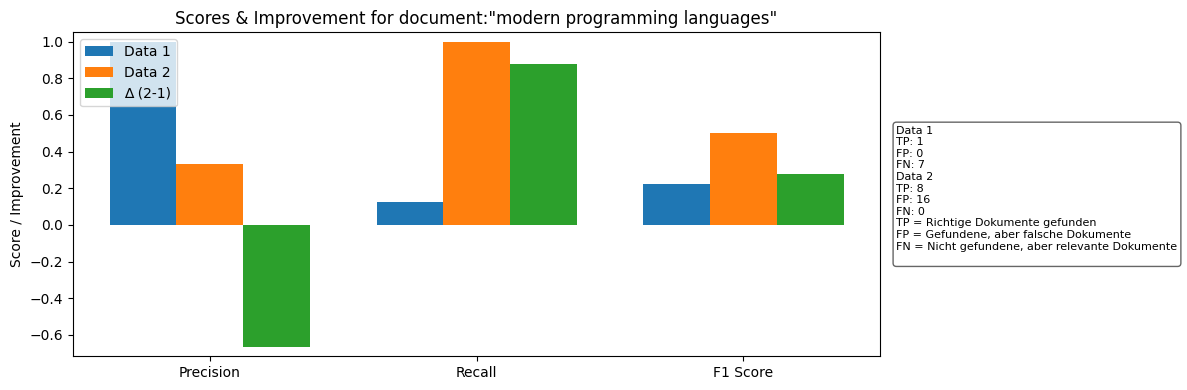

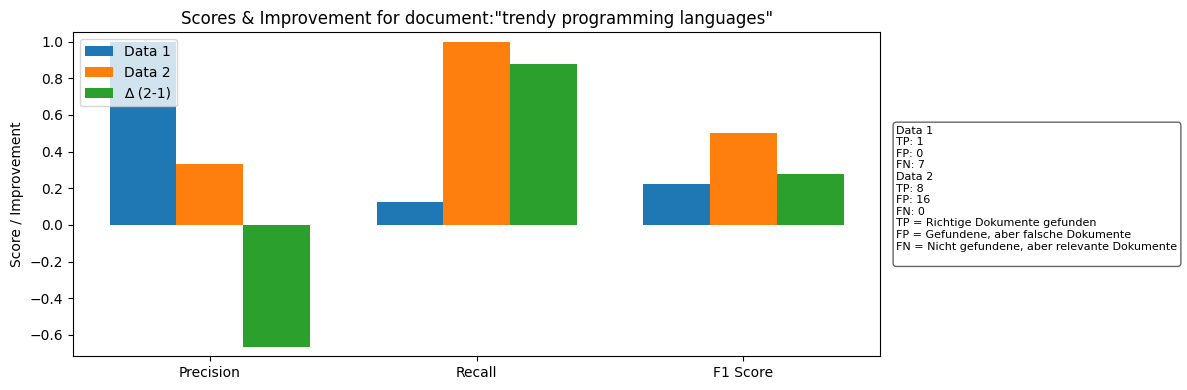

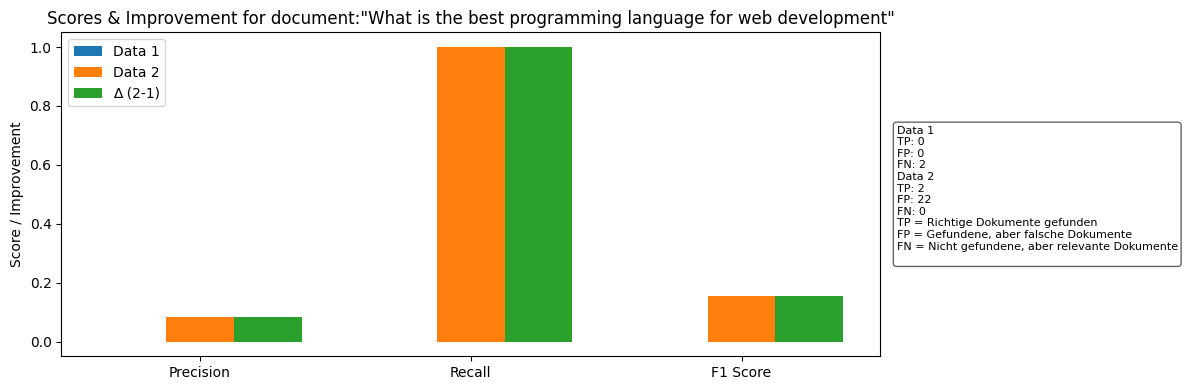

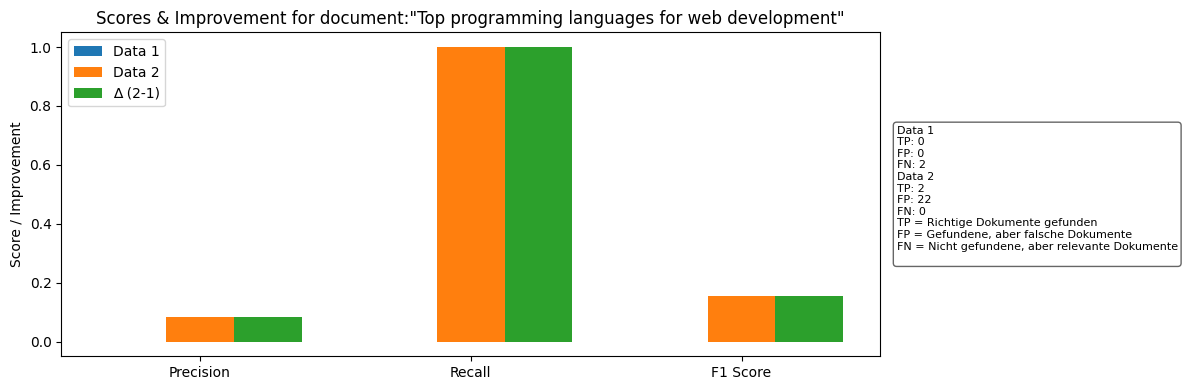

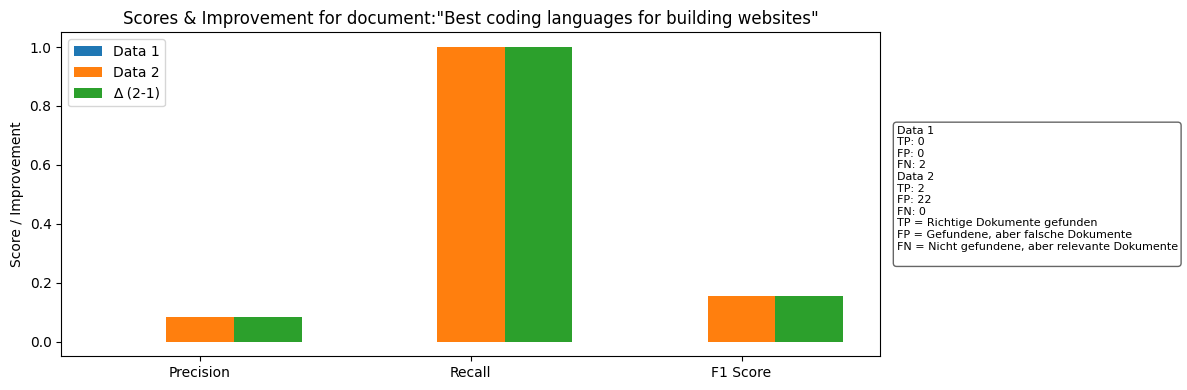

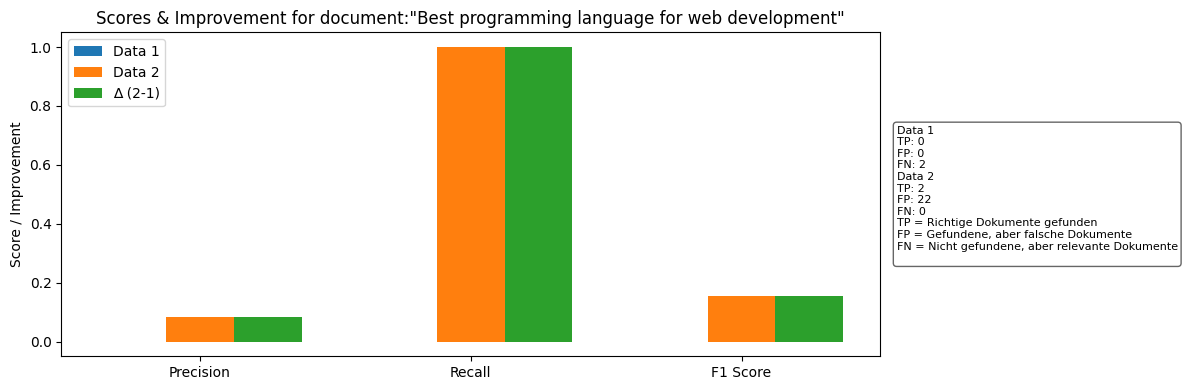

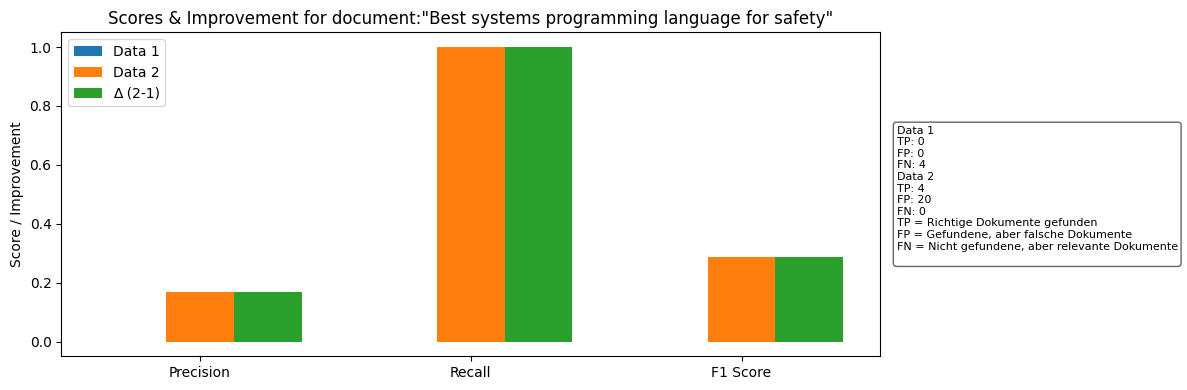

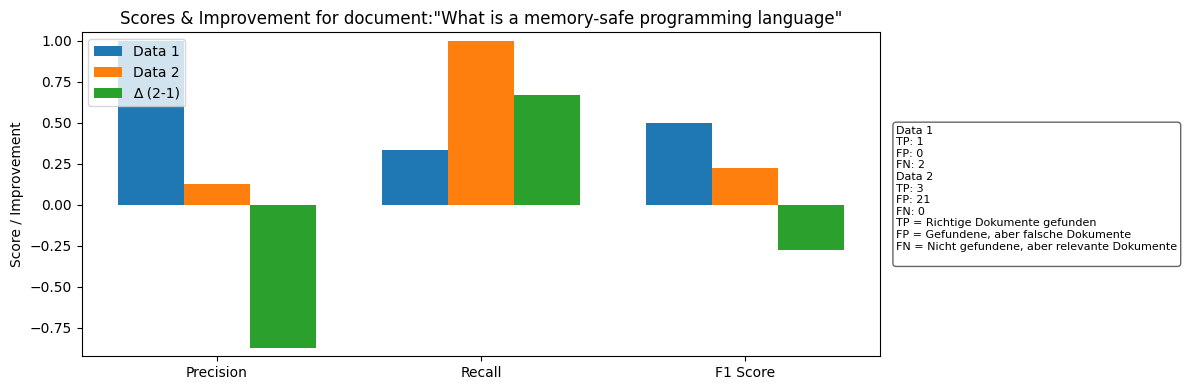

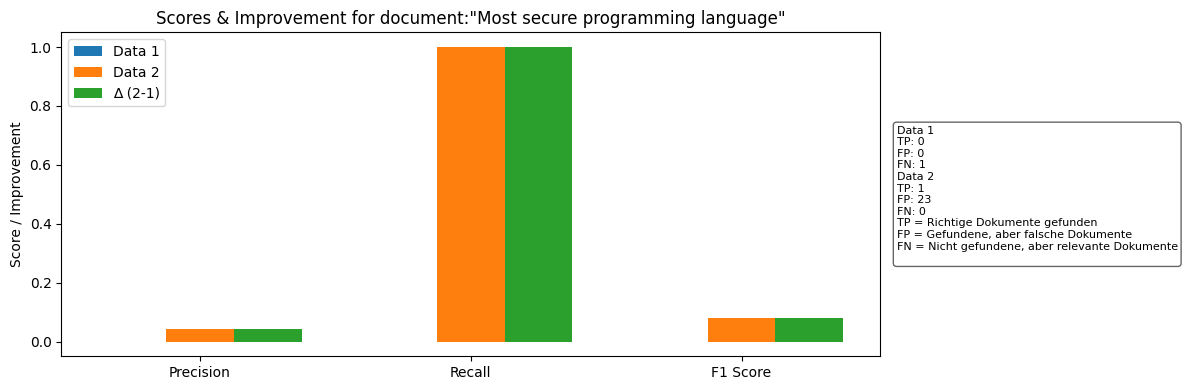

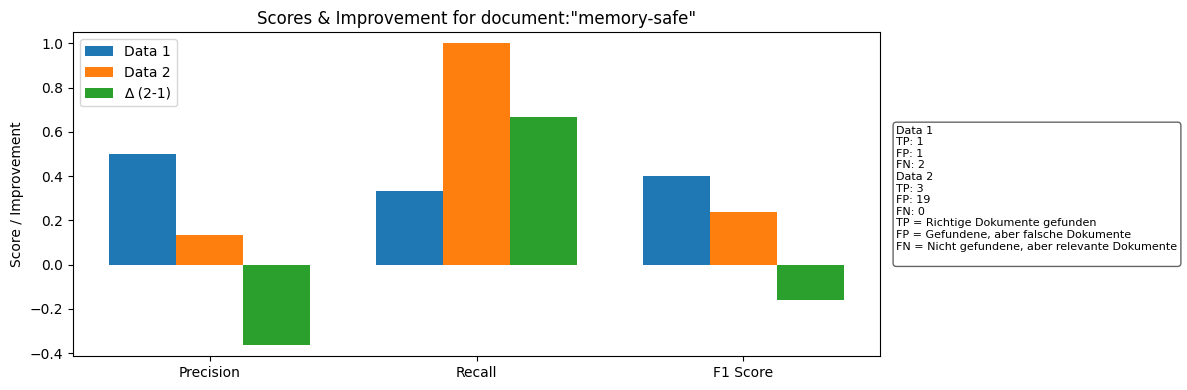

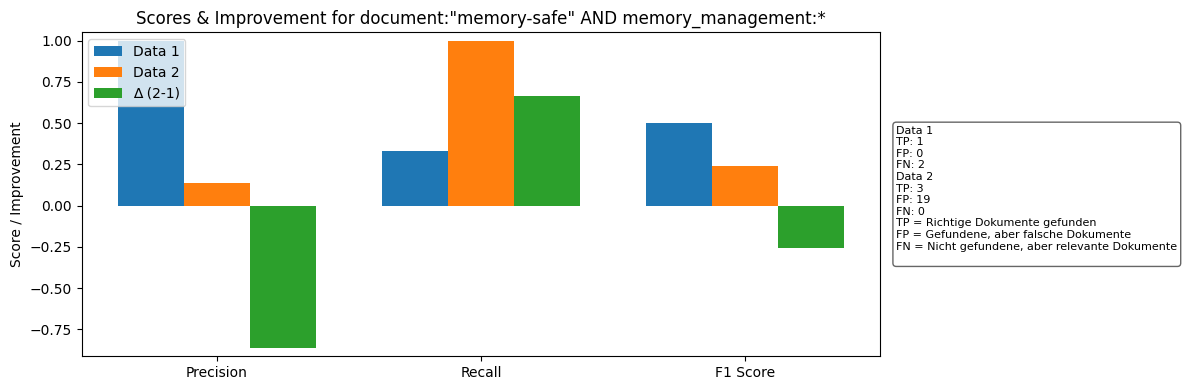

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# --- Adapter: Gruppiere results nach core ---
from collections import defaultdict

grouped = defaultdict(list)
for r in results:
    grouped[r["core"]].append(r)

# Gehe davon aus, dass genau zwei Cores da sind:
core_names = list(grouped.keys())
# if len(core_names) != 2:
#     raise ValueError("Erwarte genau 2 Cores, gefunden: " + ", ".join(core_names))

core1, core2 = core_names[1], core_names[2]
data1 = grouped[core1]
data2 = grouped[core2]

# Convert lists to dicts keyed by name
# Use 'name' key if exists, otherwise fall back to 'query' key
d1 = {}
for d in data1:
    key = d.get("name", d.get("query"))
    if key:
        d1[key] = d

d2 = {}
for d in data2:
    key = d.get("name", d.get("query")) 
    if key:
        d2[key] = d

# Find common keys between the two datasets
common_keys = set(d1.keys()) & set(d2.keys())

# Metrics and their labels
metrics = ["s1_pre", "s1_rec", "s1_f1"]
labels = ["Precision", "Recall", "F1 Score"]

# Plot improvement for each name
for name in d1:
    # raw scores + diff
    v1 = [d1[name][m] for m in metrics]
    v2 = [d2[name][m] for m in metrics]
    diff = [b - a for a, b in zip(v1, v2)]

    # build the plot
    x = np.arange(len(metrics))
    width = 0.25
    fig, ax = plt.subplots(figsize=(12, 4))

    ax.bar(x - width,   v1,   width, label="Data 1")
    ax.bar(x,           v2,   width, label="Data 2")
    ax.bar(x + width,   diff, width, label="∆ (2-1)")

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(
        min(min(diff), 0) - 0.05,
        max(v1 + v2 + diff) + 0.05
    )
    ax.set_ylabel("Score / Improvement")
    ax.set_title(f"Scores & Improvement for {name}")
    ax.legend(loc="upper left")

    # pull out TP/FP/FN from dataset 1 (or 2) and make the little comment box
    tp1, fp1, fn1 = d1[name]["tp"], d1[name]["fp"], d1[name]["fn"]
    tp2, fp2, fn2 = d2[name]["tp"], d2[name]["fp"], d2[name]["fn"]
    comment = (
        "Data 1\n"
        f"TP: {tp1}\n"
        f"FP: {fp1}\n"
        f"FN: {fn1}\n"
        "Data 2\n"
        f"TP: {tp2}\n"
        f"FP: {fp2}\n"
        f"FN: {fn2}\n"
        "TP = Richtige Dokumente gefunden\n"
        "FP = Gefundene, aber falsche Dokumente\n"
        "FN = Nicht gefundene, aber relevante Dokumente\n"
    )
    # place text to the right of the axes
    ax.text(1.02, 0.5, comment,
            transform=ax.transAxes,
            va="center", ha="left", fontsize=8,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="#666"))

    plt.tight_layout()
    plt.show()